<a href="https://colab.research.google.com/github/Nimisha-30/Breast-Cancer-Classification/blob/main/Using_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing basic dependencies

In [ ]:
import numpy as np # to create arrays and do math
import pandas as pd # to create data frame and perform analysis
import matplotlib.pyplot as plt # to visualize data
import sklearn.datasets # contains required dataset
from sklearn.model_selection import train_test_split # to split data into training and test data

#Data collection and preprocessing

In [ ]:
bc_ds=sklearn.datasets.load_breast_cancer()
bc_ds # dictionary

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [ ]:
df=pd.DataFrame(bc_ds.data, columns=bc_ds.feature_names)
df.head()
# similarly df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df['class']=bc_ds.target
df.shape

(569, 31)

In [ ]:
df.info() # tells us about number of non null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
df.isnull().sum() # talks about number of null values

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
class                      0
dtype: int64

In [ ]:
df['class'].value_counts() # checking distribution of target variable
# if distribution is uneven, perform up/down sampling

1    357
0    212
Name: class, dtype: int64

1-benign, 0-malignant

In [ ]:
df.groupby('class').mean()
# grouping data based on target variable and finding their mean

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [ ]:
# splitting data into features and target variable(s)
x=df.drop(columns='class', axis=1)
y=df['class']
print(x, y)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [ ]:
# splitting data into training set and testing set
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=2)
# rabdom state gives reproducable results
print(x.shape, x_train.shape, x_test.shape)

(569, 30) (455, 30) (114, 30)


In [ ]:
# standardize data
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()
x_train_std=scaler.fit_transform(x_train)
x_test_std=scaler.transform(x_test)
# fitting only for training data

#Building neural network

In [ ]:
import tensorflow as tf
tf.random.set_seed(3) # retains same initial weights and parameters every time program is run, to retain accuracy score
from tensorflow import keras

In [ ]:
# setting up layers of neural network = create structure
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)), # creates input layer
    keras.layers.Dense(20, activation='relu'), # creates hidden layer
    keras.layers.Dense(2, activation='sigmoid') # creates output layer
    ]) # stacks layers of neural network
# Dense() means all neurons in a layer are connected to neurons in previous layer
# Flatten() converts multi-dimensional input dataset into single dimension input
# 1 feature - 1 neuron => Number of features = Number of neurons in input layer
# relu = rectified linear units
# Number of neurons in output layer = Number of classes in output layer

In [ ]:
# compiling the neural network
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# if target variable is 2/3 int, use sparse_categorical_crossentropy
# if we have 10/20 target variables or one hot encoded labels, use categorical_crossentropy

In [ ]:
# training neural network
history=model.fit(x_train_std, y_train, validation_split=0.1, epochs=10)
# validation split, similar to train_test_split
# epochs is the number of times the model has to go through the data

Epoch 1/10
13/13 [==============================] - 0s 14ms/step - loss: 0.0831 - accuracy: 0.9682 - val_loss: 0.0660 - val_accuracy: 0.9783
Epoch 2/10
13/13 [==============================] - 0s 14ms/step - loss: 0.0594 - accuracy: 0.9707 - val_loss: 0.0607 - val_accuracy: 0.9783
Epoch 3/10
13/13 [==============================] - 0s 13ms/step - loss: 0.0454 - accuracy: 0.9829 - val_loss: 0.0594 - val_accuracy: 0.9783
Epoch 4/10
13/13 [==============================] - 0s 13ms/step - loss: 0.0413 - accuracy: 0.9878 - val_loss: 0.0581 - val_accuracy: 0.9783
Epoch 5/10
13/13 [==============================] - 0s 12ms/step - loss: 0.0389 - accuracy: 0.9878 - val_loss: 0.0569 - val_accuracy: 0.9783
Epoch 6/10
13/13 [==============================] - 0s 7ms/step - loss: 0.0369 - accuracy: 0.9878 - val_loss: 0.0568 - val_accuracy: 0.9783
Epoch 7/10
13/13 [==============================] - 0s 8ms/step - loss: 0.0353 - accuracy: 0.9902 - val_loss: 0.0557 - val_accuracy: 0.9783
Epoch 8/10
13/1

Less accuracy means need to apply standard scaler function as data varies.

Loss decreases => accuracy increases.

#Visualizing accuracy and loss

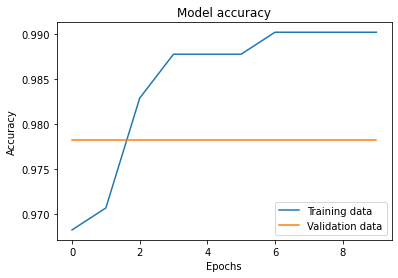

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training data', 'Validation data'], loc='lower right')

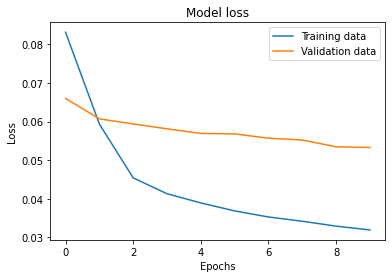

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training data', 'Validation data'], loc='upper right')

Accuracy of model on test data

In [ ]:
loss, accuracy=model.evaluate(x_test_std, y_test)

In [ ]:
print(x_test_std)
print(x_test_std[0])

In [ ]:
# model.predict() gives probability of object belonging to a class
y_pred=model.predict(x_test_std)

In [ ]:
print(y_pred.shape)
print(y_pred[0])

In [ ]:
print(x_test)

In [ ]:
print(y_pred)

In [ ]:
# convert probability to labels
y_pred_class=[np.argmax(i) for i in y_pred]
print(y_pred_class)

#Builiding predictive system

In [ ]:
inputData=()
# convert input data format to array
inData_asnpArray=np.asarray(inputData)
# reshape input data array
inData_reshaped=inputData_asanArray.reshape(1, -1)
# standardise data
inData_std=scaler.transform(inData_reshaped)
# predict the model
prediction=model.predict(inData_std)
print(prediction)
prediction_label=[np.argmax(prediction)]
print(prediction_label)
if(prediction_label[0]==0):
    print("Tumor - malignant")
else:
    print("Tumor - beningn")